In [366]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [367]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [368]:
class Fitness:
    def __init__(self, route):
        self.route = np.array(route)
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance == 0:
            pathDistances = [self.route[i].distance(self.route[(i + 1) % len(self.route)]) for i in range(len(self.route))]
            self.distance = np.sum(pathDistances)
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [369]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [370]:
def initialPopulation(popSize, cityList):
    return [random.sample(cityList, len(cityList)) for _ in range(popSize)]

In [371]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [372]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [373]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [374]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [375]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [376]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [377]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [378]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [379]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Distancia Inicial: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Distancia Final: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [380]:
cityList_A = []

for i in range(0,8):
    cityList_A.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [381]:
bestRoute_A = geneticAlgorithm(population=cityList_A, popSize=50, eliteSize=15, mutationRate=0.01, generations=70)
print("\nRuta para el Problema A:")
bestRoute_A

Distancia Inicial: 616.2842449096638
Distancia Final: 500.4880967250893

Ruta para el Problema A:


[(53,74), (25,157), (66,119), (173,129), (184,75), (113,41), (111,21), (43,60)]

In [382]:
cityList_B = []
for i in range(0, 2): 
    cityList_B.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [383]:
bestRoute_B = geneticAlgorithm(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=150)
print("\nRuta para el Problema B:")
bestRoute_B

Distancia Inicial: 167.29614460590537
Distancia Final: 167.29614460590537

Ruta para el Problema B:


[(95,156), (21,117)]

In [384]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

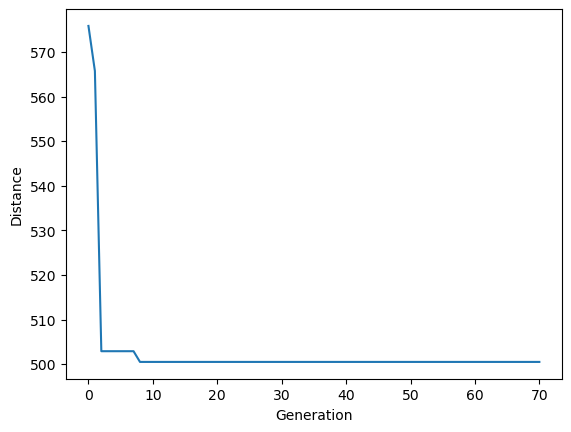

In [385]:
geneticAlgorithmPlot(population=cityList_A, popSize=100, eliteSize=15, mutationRate=0.01, generations=70)

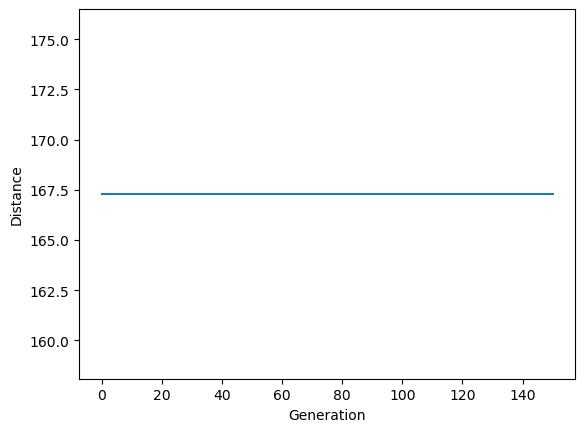

In [386]:
geneticAlgorithmPlot(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=150)

In [387]:
def calc_distance(route):
    total_distance = 0
    for i in range(len(route)):
        fromCity = route[i]
        toCity = route[(i + 1) % len(route)]  # Asegura el retorno a la ciudad de origen
        total_distance += fromCity.distance(toCity)
    return total_distance

In [388]:
def calc_fuel_usage(total_distance, fuel_efficiency):
    return total_distance / fuel_efficiency

In [389]:
def calc_time(route, average_speed):
    total_distance = calc_distance(route)
    distance_time = total_distance / average_speed  # Tiempo = Distancia / Velocidad
    return distance_time

In [390]:
# Asumiendo una eficiencia de combustible en km/L para el vehículo
fuel_efficiency = 7
average_speed = 120 # Asumiendo una velocidad promedio en km/h

In [391]:
# Creación de comparaciones
## Calcular tiempo de trayectoria
distance_time_A = calc_time(bestRoute_A, average_speed)
distance_time_B = calc_time(bestRoute_B, average_speed)

## Calcular la distancia y combustible total para el Problema A
total_distance_A = calc_distance(bestRoute_A)
fuel_usage_A = calc_fuel_usage(distance_time_A, fuel_efficiency)

# Calcular la distancia total para el Problema B
total_distance_B = calc_distance(bestRoute_B)
fuel_usage_B = calc_fuel_usage(distance_time_A, fuel_efficiency)

In [392]:
#Muestra de comparaciones

##Resultados Ruta A:
print("Resultados Ruta A:")
print("Tiempo de Trayectoria A: {:.2f} horas".format(distance_time_A))
print("Distancia Total para el Problema A: {:.2f} km".format(total_distance_A))
print("Uso Estimado de Combustible para el Problema A: {:.2f} L".format(fuel_usage_A))


##Resultados Ruta B:
print("\nResultados Ruta B:")
print("Tiempo de Trayectoria B: {:.2f} horas".format(distance_time_B))
print("Distancia Total para el Problema B: {:.2f} km".format(total_distance_B))
print("Uso Estimado de Combustible para el Problema B: {:.2f} L".format(fuel_usage_B))



Resultados Ruta A:
Tiempo de Trayectoria A: 4.17 horas
Distancia Total para el Problema A: 500.49 km
Uso Estimado de Combustible para el Problema A: 0.60 L

Resultados Ruta B:
Tiempo de Trayectoria B: 1.39 horas
Distancia Total para el Problema B: 167.30 km
Uso Estimado de Combustible para el Problema B: 0.60 L


In [393]:
def plot_route(cityList, bestRoute, title="Mejor Ruta"):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Dibujar las ciudades
    for city in cityList:
        ax.plot(city.x, city.y, 'o', markersize=8, color='blue')

    # Dibujar la ruta óptima
    for i in range(-1, len(bestRoute) - 1):
        start_city = bestRoute[i]
        end_city = bestRoute[i + 1]
        ax.plot([start_city.x, end_city.x], [start_city.y, end_city.y], 'r-')

    # Añadir títulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

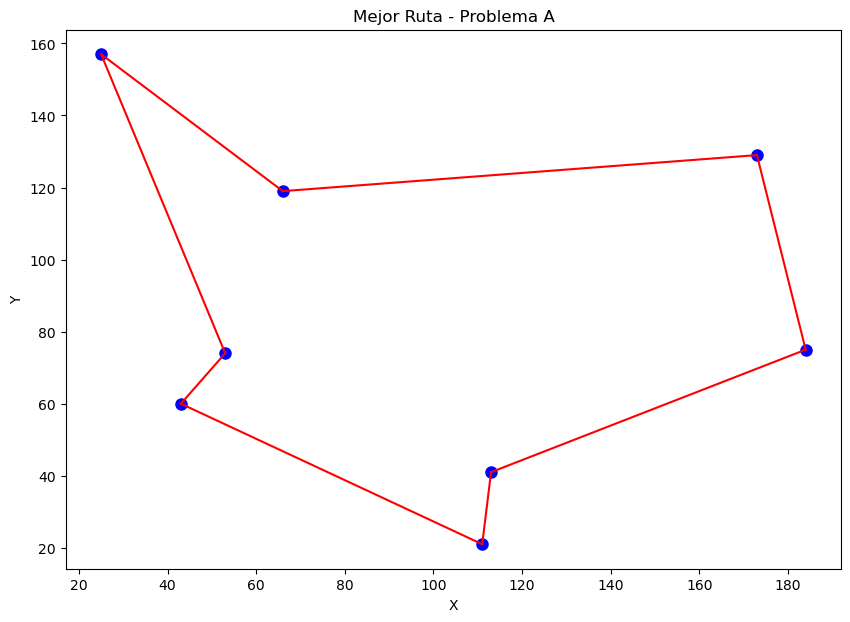

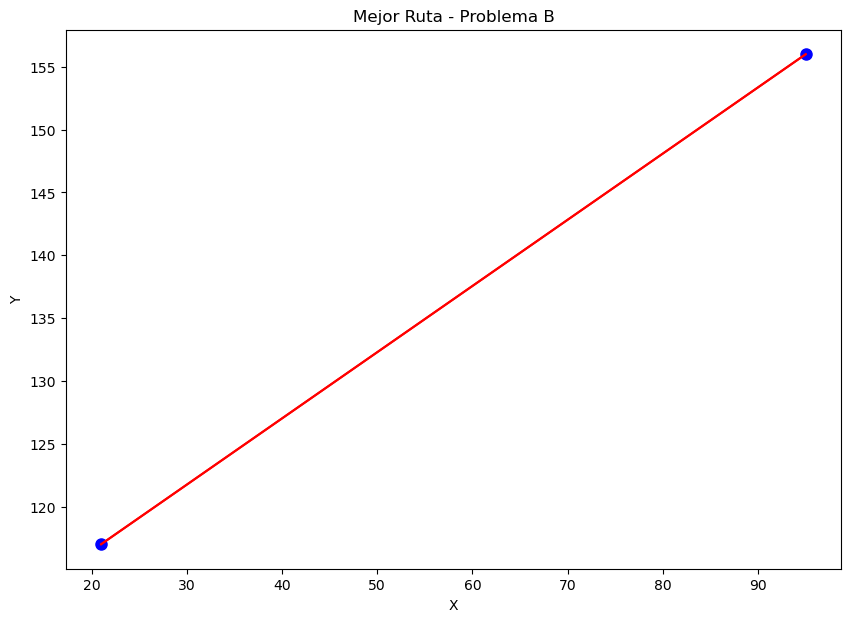

In [394]:
# Graficar la mejor ruta para el Problema A
plot_route(cityList_A, bestRoute_A, "Mejor Ruta - Problema A")

# Graficar la mejor ruta para el Problema B
plot_route(cityList_B, bestRoute_B, "Mejor Ruta - Problema B")
